## PAD - Project 1

In [18]:
# some librabries used for overall usage

import warnings
warnings.filterwarnings(action='ignore')


import statsmodels.api as sm
import scipy.stats as stats

### Reading data
https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set

Ambient temperature (AT) C \
Ambient pressure (AP) mbar \
Ambient humidity (AH) (%) \
Air filter difference pressure (AFDP) mbar \
Gas turbine exhaust pressure (GTEP) mbar \
Turbine inlet temperature (TIT) C \
Turbine after temperature (TAT) C \
Compressor discharge pressure (CDP) mbar \
Turbine energy yield (TEY) MWH \
Carbon monoxide (CO) mg/m3 \
Nitrogen oxides (NOx) mg/m3 

In [66]:
import pandas as pd
import numpy as np
import pickle

raw_data_2011 = pd.read_csv('gt_2011.csv')
raw_data_2011.insert(11,'Year',[2011]*len(raw_data_2011))

raw_data_2012 = pd.read_csv('gt_2012.csv')
raw_data_2012.insert(11,'Year',[2012]*len(raw_data_2012))

raw_data_2013 = pd.read_csv('gt_2013.csv')
raw_data_2013.insert(11,'Year',[2013]*len(raw_data_2013))

raw_data_2014 = pd.read_csv('gt_2014.csv')
raw_data_2014.insert(11,'Year',[2014]*len(raw_data_2014))

raw_data_2015 = pd.read_csv('gt_2015.csv')
raw_data_2015.insert(11,'Year',[2015]*len(raw_data_2015))

In [67]:
raw_data = pd.concat([raw_data_2011,raw_data_2012,raw_data_2013,raw_data_2014,raw_data_2015],ignore_index=True)

In [69]:
raw_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,2015
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,2015
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,2015
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,2015


### Data Visualization

<AxesSubplot:>

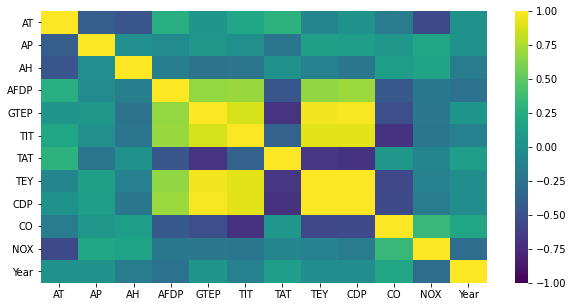

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.heatmap(raw_data.corr(), cmap = 'viridis', vmin=-1, vmax=1)

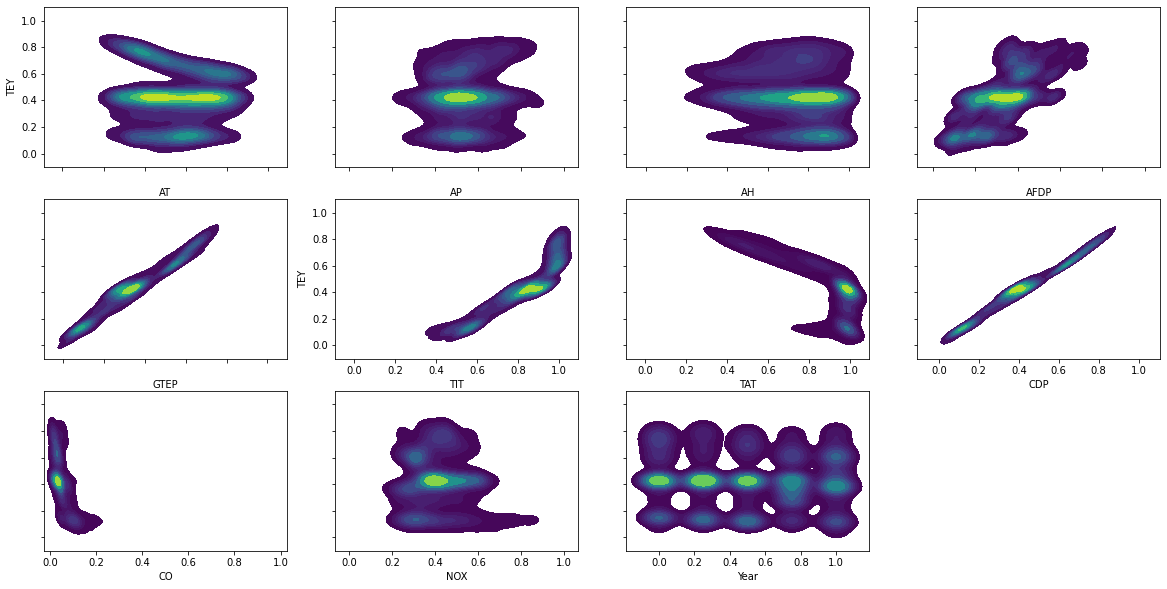

In [71]:
cols = raw_data.columns.delete(7)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(raw_data)
norm_data = pd.DataFrame(norm_data, columns= raw_data.columns)
plt.figure(figsize=(20,10))
for i in range(len(cols)):

    plt.subplot(3,4,i+1)
    sns.kdeplot(x = norm_data[cols[i]],y = norm_data['TEY'], fill=True, cmap='viridis')
    plt.xticks(ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
    if i != 0 and i!= 5:
        plt.ylabel('')
        plt.yticks(color ='white')

    if i < 5:
        plt.xticks(color = 'white')
        

Text(0, 0.5, 'Turbine energy yield (MWH)')

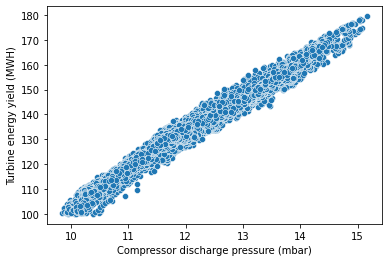

In [85]:
sns.scatterplot(raw_data['CDP'],raw_data['TEY'])
plt.xlabel('Compressor discharge pressure (mbar)')
plt.ylabel('Turbine energy yield (MWH)')
#cbar = plt.colorbar()
#cbar.set_label('Turbine energy yield (MWH)')


<AxesSubplot:xlabel='TEY', ylabel='Count'>

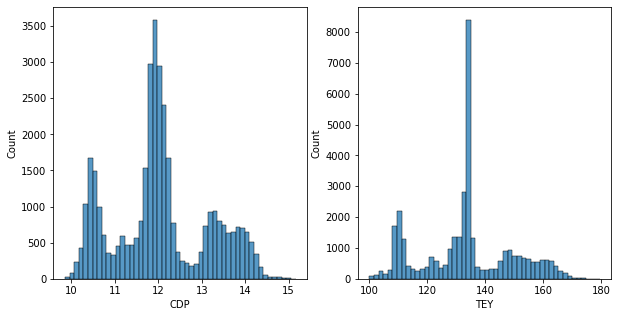

In [87]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(raw_data['CDP'],bins=50)
plt.subplot(1,2,2)
sns.histplot(raw_data['TEY'],bins=50)

# Regression Analysis

In [74]:
# Defining the variables that will be used y -> target, x -> variable to use to estimate the target
x = np.array(raw_data['CDP'].copy()); print('Initial shape of x:',x.shape)
y = np.array(raw_data['TEY'].copy()); print('Initial shape of y:',y.shape)

Initial shape of x: (36733,)
Initial shape of y: (36733,)


### Building a regression model with the normal variables

In [75]:
# using a built-in function from numpy polyfit, which does not require any change to data.
# X: vector or matrix to use to predict the target class.
# Y: target values / value that we want to predict.
# deg: Degree of the polynomial function that we want / coefficients.
# Returns the highest coefficients first 
coef = np.polyfit(x,y,1); print('b1:',coef[0],'b0',coef[1],'Nº coefs:',len(coef))

b1: 14.183895250898392 b0 -37.55882183993289 Nº coefs: 2


### The regression line is given by:
 $\hat{y} = \beta_0 + \beta_1 x \ \equiv \ \hat{y} = -37.56 + 14.18 x$ 

In [76]:
y_hat = x*coef[0]+coef[1]

### Let's plot our dataset and the regression line obtained

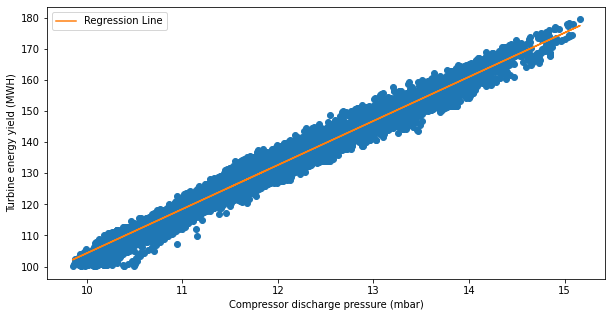

In [77]:
plt.figure(figsize=(10,5))

# Dataset
plt.plot(x,y,'o')

# Regression Line
plt.plot(x,y_hat, label = 'Regression Line')

# defining the label of the plot
plt.xlabel('Compressor discharge pressure (mbar)');plt.ylabel('Turbine energy yield (MWH)')
plt.legend()

### Check normality of the residuals

Text(0.5, 1.0, 'Standardized Residuals vs. Fits')

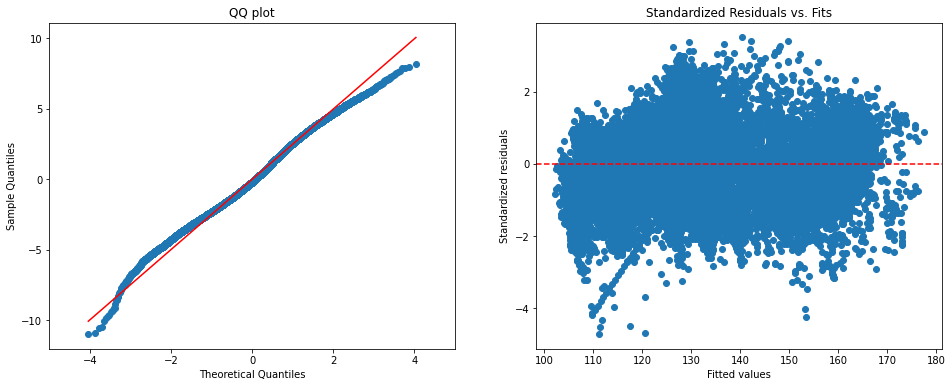

In [90]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
residuals = y - y_hat
degrees_of_freedom = len(x) - 1

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'QQ plot') 
axs[0].set_xlim(-5,5)


# Calculate the standardized residuals manually
mean_resid = np.mean(residuals)
std_resid = np.std(residuals, ddof=1)
std_resid = residuals / std_resid

# Create the plot
plt.scatter(y_hat, std_resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Standardized Residuals vs. Fits')